<a href="https://colab.research.google.com/github/adelomana/HUVECs/blob/main/pipeline2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas, seaborn, umap

import sklearn, sklearn.preprocessing, sklearn.decomposition, sklearn.manifold

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6), 'axes.labelsize':20})

# User-defined variables

In [2]:
storage_file = '/content/drive/MyDrive/hi/research/huvec/results/untargeted/batch_normalized_cell_number_normalized_log10_intensities_untargeted_data.csv'

# metadata path: '/content/drive/MyDrive/hi/research/huvec/data/untargetted/peak_annotation.gsheet'
metadata_url = 'https://docs.google.com/spreadsheets/d/1ykLV2Qse2POfaGwI9hfvguRuy7xUZwJEqJIqz2KZHio/gviz/tq?tqx=out:csv'

In [3]:
treatments = ['EGM', '1.0', '10.0', '100.0']
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for timepoint in timepoints[1:]:
  for treatment in treatments[1:]:
    condition = (treatment, timepoint)
    conditions.append(condition)
print(conditions, len(conditions))

condition_colors = ['white', 'white', 'white', 'green', 'yellow', 'red', 'green', 'yellow', 'red']
condition_labels = ['c 0h', 'c 4h', 'c 24h', '0.5 4h', '5 4h', '50 4h', '0.5 24h', '5 24h', '50 24h']

print(condition_colors, len(condition_colors))

[('EGM', 0), ('EGM', 4), ('EGM', 24), ('1.0', 4), ('10.0', 4), ('100.0', 4), ('1.0', 24), ('10.0', 24), ('100.0', 24)] 9
['white', 'white', 'white', 'green', 'yellow', 'red', 'green', 'yellow', 'red'] 9


# Read information

Read metadata.

In [4]:
peak_metadata = pandas.read_csv(metadata_url, index_col=0, usecols=[0, 1]).transpose()
peak_metadata

metabolite name,2-hydroxy glutarate,adrenaline sulfate,adrenaline sulfonic acid,ask ottar
peak name,X147.02834999999999,X262.03859999999997,X276.05410000000001,X276.05387000000002


Read data.

In [5]:
wdf = pandas.read_csv(storage_file, index_col=0)
print(wdf.shape)
wdf.head()

(123, 1233)


,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0.0,0.0,2.821439,3.124491,2.616441,3.217376,3.043017,3.197272,4.307763,3.704660,2.765308,2.798424,2.902056,3.334968,3.094039,3.025382,2.884566,3.142901,2.709008,3.071986,3.386607,2.749876,3.724720,3.680670,2.854928,2.847751,4.379313,3.638480,3.136556,3.647665,3.217423,4.017526,2.710823,3.933556,3.231942,4.535770,4.692813,3.055572,4.312016,...,3.759129,3.561951,3.200265,3.375864,3.177062,3.703838,3.597935,3.096636,3.100725,3.279006,2.887612,2.979256,3.140692,3.185921,3.187390,3.692896,3.957978,3.901673,3.777269,3.212084,3.212746,3.524655,3.580375,3.484183,3.297954,3.389564,3.400843,3.455383,3.071191,3.097606,3.099440,3.101517,3.107570,3.192940,3.145987,3.715622,3.789103,3.947087,3.851484,3.835826
1,EGM,0.0,1.0,2.690833,3.129044,2.667042,3.245521,3.118299,3.314815,4.227972,3.711723,2.704722,2.680737,2.615731,3.381138,3.059378,2.999520,2.883906,3.108636,2.813840,3.202341,3.433551,2.708028,3.831653,3.836557,2.914189,2.854788,4.492962,3.764737,3.301952,3.632459,3.210970,4.025126,2.618770,4.240965,3.492230,4.242134,4.728138,3.179445,4.260895,...,3.804378,3.453993,3.119875,3.202819,3.141643,3.653205,3.614876,3.079381,3.082747,3.258084,2.939576,3.003549,3.133062,3.177375,3.178706,3.733124,3.896368,3.767640,3.883820,3.169703,3.172196,3.472035,3.491666,3.288865,3.236692,3.386271,3.483163,3.507948,3.210528,3.278386,3.292778,3.298229,3.200762,3.199623,2.984673,3.812857,3.912648,3.949868,3.974549,3.937870
2,EGM,0.0,2.0,2.683283,3.162739,2.497143,3.229593,3.140814,3.158732,3.955754,3.601296,2.588404,2.685360,2.625108,3.384905,2.933584,3.004376,2.963872,2.977434,2.711968,3.002703,3.411132,2.658845,3.678575,3.699551,2.912170,3.001594,4.509768,3.676566,3.219849,3.686092,3.366971,4.605468,2.625949,4.309296,3.604823,4.624731,4.633401,3.022088,4.302388,...,3.448490,3.286124,3.114408,3.103225,2.940447,3.494132,3.554420,2.909094,2.909047,3.211293,3.031668,3.064072,3.294098,3.339877,3.318823,3.789783,3.752094,3.992087,3.884142,2.933724,2.925259,3.270022,3.237847,3.150527,3.363390,3.457294,3.561346,3.509321,3.217736,3.301218,3.309562,3.359721,3.194526,3.361437,2.607677,3.824979,3.982661,3.891479,3.969419,3.952886
3,EGM,0.0,3.0,2.847722,3.159486,2.469182,3.145799,3.050170,3.114476,4.183452,3.613092,2.609338,2.805495,2.752284,3.339308,3.072559,3.269930,2.964258,3.177013,2.637107,2.994483,3.642056,2.801616,3.865164,3.840050,2.960220,3.001802,4.679675,3.779540,3.133842,3.686234,3.302359,4.612561,2.810598,3.807008,3.439563,4.529276,4.699124,2.990049,4.397219,...,3.257394,3.457344,3.

In [6]:
peak_names = wdf.columns.to_list()[3:]
print(peak_names)

['X59.01097', 'X61.017890000000001', 'X67.016220000000004', 'X74.021450000000002', 'X77.052040000000005', 'X77.052049999999994', 'X78.956580000000002', 'X78.956770000000006', 'X79.955420000000004', 'X80.962869999999995', 'X80.962720000000004', 'X82.951819999999998', 'X84.006739999999994', 'X84.043059999999997', 'X84.949100000000001', 'X85.027289999999994', 'X85.027019999999993', 'X85.027270000000001', 'X86.991519999999994', 'X87.006460000000004', 'X88.037970000000001', 'X88.037940000000006', 'X88.038039999999995', 'X88.03792', 'X89.022130000000004', 'X89.022099999999995', 'X89.040549999999996', 'X92.032160000000005', 'X92.031949999999995', 'X92.925600000000003', 'X93.043189999999996', 'X94.922759999999997', 'X96.919939999999997', 'X96.965789999999998', 'X96.967179999999999', 'X96.957989999999995', 'X96.965829999999997', 'X97.009529999999998', 'X100.0742', 'X102.02508', 'X102.05382', 'X102.05362', 'X102.94647999999999', 'X102.94672', 'X102.95457', 'X104.03297000000001', 'X104.95166', 'X

# Spot check for adrenaline metabolite sulfate


In [7]:
wdf.tail()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
118,100.0,24.0,7.0,2.489912,2.974599,2.768753,3.088417,2.663325,2.949271,3.633011,3.282804,2.575468,2.859259,2.545664,3.380282,2.715474,3.146963,3.007790,2.819285,2.766875,2.792190,3.218499,2.426648,3.309059,3.445756,2.857922,2.588724,4.585443,3.396039,2.994575,3.535015,3.114673,3.162140,2.411052,3.312917,2.420340,3.498632,4.181063,2.886087,4.022873,...,3.200010,3.118154,3.041976,3.070456,2.896415,3.213623,3.193894,2.683249,2.705001,3.002715,2.230727,2.351739,2.665513,2.680146,2.738766,3.123398,3.542716,3.380203,3.371489,2.680173,2.702712,2.933298,2.934669,2.950722,2.752230,2.789002,3.138322,2.909596,2.411900,2.326422,2.338844,2.477586,2.436596,2.757495,2.585576,3.069082,3.317777,3.313068,3.302228,3.266164
119,100.0,24.0,8.0,2.470793,2.686079,2.331500,2.671714,2.924629,3.161433,3.605166,3.293969,2.426703,2.585070,2.320067,3.122743,2.746037,2.831900,2.813297,2.803410,2.573104,2.796217,3.244356,2.454455,3.287103,3.299806,2.440073,2.473241,4.294784,3.524526,3.138228,3.390014,3.139342,3.161759,2.378659,3.452635,2.862354,3.772476,4.282401,2.675249,4.021412,...,3.052857,2.558344,2.412093,2.389498,2.319947,2.426212,2.471828,1.935248,1.937281,2.710135,2.430235,2.637433,2.930712,2.964853,2.792534,3.098022,3.477987,3.453540,3.602362,2.019197,2.016326,2.243824,2.258954,2.305683,2.853938,2.870932,2.952750,3.088771,2.378848,2.324107,2.336326,2.471661,2.534225,2.982833,1.885411,3.575372,3.641811,3.315545,3.670722,3.566318
120,100.0,24.0,9.0,2.442417,2.844839,2.736338,2.882299,2.812861,3.149766,3.893882,3.350269,2.548650,2.853187,2.384828,3.120764,2.878865,3.341251,2.747753,3.075758,2.790570,3.155677,3.503733,2.594719,3.745055,3.818384,2.822361,2.957731,4.674384,3.761318,3.001778,3.494168,2.914386,4.061713,2.290947,3.844576,2.911258,3.772235,4.430578,2.987712,4.310483,...,2.643258,3.306279,3.051799,3.063497,2.892524,2.234470,2.299028,1.804600,1.804499,2.811977,2.456449,2.583646,2.919447,2.950074,2.953237,3.434270,3.640197,3.480316,3.533953,1.908220,1.905806,2.113025,2.125544,2.172497,2.970367,3.049157,3.170023,3.110360,2.677795,2.683537,2.731772,2.808338,2.697953,2.957495,1.763406,3.425790,3.578313,3.631911,3.611437,3.536360
121,100.0,24.0,10.0,2.562832,2.961167,2.221580,2.863486,2.662333,3.102048,4.019892,3.267446,2.426579,2.510257,2.323613,2.895134,3.005440,3.196786,2.533755,3.231798,2.432015,2.980784,3.368555,2.537173,3.722719,3.867798,2.726918,2.939895,4.571890,3.772467,3.221196,3.491406,2.964568,3.574647,2.488489,3.533453,2.781742,3.499245,4.473605,2.945566,4.327973,...

In [8]:
target = 'adrenaline sulfate'
working_peak_mz = peak_metadata[target].values[0]

In [9]:
plotting_values = []

for condition in conditions:
  treatment = condition[0]; timepoint = condition[1]

  sub = wdf[(wdf['Treatment'] == treatment) & (wdf['Time'] == timepoint)][working_peak_mz]
  box = sub.values
  plotting_values.append(box)

  print('treatment {}, timepoint {}, shape {}'.format(treatment, timepoint, sub.shape))

treatment EGM, timepoint 0, shape (6,)
treatment EGM, timepoint 4, shape (15,)
treatment EGM, timepoint 24, shape (15,)
treatment 1.0, timepoint 4, shape (15,)
treatment 10.0, timepoint 4, shape (15,)
treatment 100.0, timepoint 4, shape (15,)
treatment 1.0, timepoint 24, shape (15,)
treatment 10.0, timepoint 24, shape (15,)
treatment 100.0, timepoint 24, shape (12,)


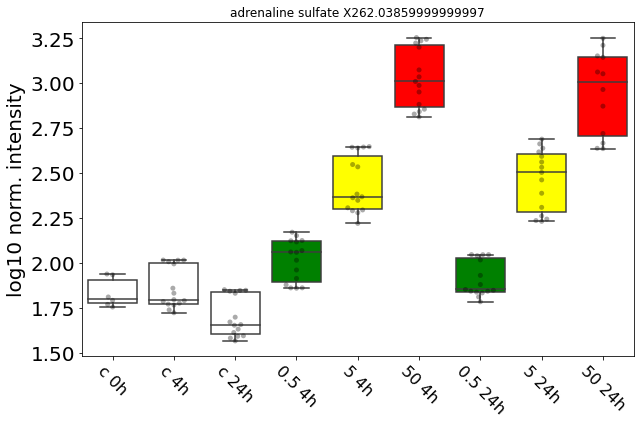

In [10]:
matplotlib.pyplot.figure(figsize=(9, 6))

g = seaborn.boxplot(data=plotting_values)
h = seaborn.swarmplot(data=plotting_values, color='black', alpha=1/3)

g.set(ylabel='log10 norm. intensity', title='{} {}'.format(target, working_peak_mz))
for i in range(len(g.artists)):
    g.artists[i].set_facecolor(condition_colors[i])
matplotlib.pyplot.xticks(list(range(len(condition_colors))), condition_labels, fontsize=16, rotation=-45)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# PCA

In [11]:
wdf.head()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0.0,0.0,2.821439,3.124491,2.616441,3.217376,3.043017,3.197272,4.307763,3.704660,2.765308,2.798424,2.902056,3.334968,3.094039,3.025382,2.884566,3.142901,2.709008,3.071986,3.386607,2.749876,3.724720,3.680670,2.854928,2.847751,4.379313,3.638480,3.136556,3.647665,3.217423,4.017526,2.710823,3.933556,3.231942,4.535770,4.692813,3.055572,4.312016,...,3.759129,3.561951,3.200265,3.375864,3.177062,3.703838,3.597935,3.096636,3.100725,3.279006,2.887612,2.979256,3.140692,3.185921,3.187390,3.692896,3.957978,3.901673,3.777269,3.212084,3.212746,3.524655,3.580375,3.484183,3.297954,3.389564,3.400843,3.455383,3.071191,3.097606,3.099440,3.101517,3.107570,3.192940,3.145987,3.715622,3.789103,3.947087,3.851484,3.835826
1,EGM,0.0,1.0,2.690833,3.129044,2.667042,3.245521,3.118299,3.314815,4.227972,3.711723,2.704722,2.680737,2.615731,3.381138,3.059378,2.999520,2.883906,3.108636,2.813840,3.202341,3.433551,2.708028,3.831653,3.836557,2.914189,2.854788,4.492962,3.764737,3.301952,3.632459,3.210970,4.025126,2.618770,4.240965,3.492230,4.242134,4.728138,3.179445,4.260895,...,3.804378,3.453993,3.119875,3.202819,3.141643,3.653205,3.614876,3.079381,3.082747,3.258084,2.939576,3.003549,3.133062,3.177375,3.178706,3.733124,3.896368,3.767640,3.883820,3.169703,3.172196,3.472035,3.491666,3.288865,3.236692,3.386271,3.483163,3.507948,3.210528,3.278386,3.292778,3.298229,3.200762,3.199623,2.984673,3.812857,3.912648,3.949868,3.974549,3.937870
2,EGM,0.0,2.0,2.683283,3.162739,2.497143,3.229593,3.140814,3.158732,3.955754,3.601296,2.588404,2.685360,2.625108,3.384905,2.933584,3.004376,2.963872,2.977434,2.711968,3.002703,3.411132,2.658845,3.678575,3.699551,2.912170,3.001594,4.509768,3.676566,3.219849,3.686092,3.366971,4.605468,2.625949,4.309296,3.604823,4.624731,4.633401,3.022088,4.302388,...,3.448490,3.286124,3.114408,3.103225,2.940447,3.494132,3.554420,2.909094,2.909047,3.211293,3.031668,3.064072,3.294098,3.339877,3.318823,3.789783,3.752094,3.992087,3.884142,2.933724,2.925259,3.270022,3.237847,3.150527,3.363390,3.457294,3.561346,3.509321,3.217736,3.301218,3.309562,3.359721,3.194526,3.361437,2.607677,3.824979,3.982661,3.891479,3.969419,3.952886
3,EGM,0.0,3.0,2.847722,3.159486,2.469182,3.145799,3.050170,3.114476,4.183452,3.613092,2.609338,2.805495,2.752284,3.339308,3.072559,3.269930,2.964258,3.177013,2.637107,2.994483,3.642056,2.801616,3.865164,3.840050,2.960220,3.001802,4.679675,3.779540,3.133842,3.686234,3.302359,4.612561,2.810598,3.807008,3.439563,4.529276,4.699124,2.990049,4.397219,...,3.257394,3.457344,3.

In [12]:
# Separating out the features
x = wdf.loc[:, peak_names].values

sub4 = wdf[wdf['Time'] == 4]
x4 = sub4.loc[:, peak_names].values

sub24 = wdf[wdf['Time'] == 24]
x24 = sub24.loc[:, peak_names].values

print(x[:3])

[[2.82143937 3.12449112 2.61644145 ... 3.9470871  3.85148442 3.8358261 ]
 [2.69083283 3.12904362 2.6670419  ... 3.9498683  3.97454862 3.93786971]
 [2.68328286 3.16273915 2.49714266 ... 3.89147879 3.96941944 3.95288572]]


In [13]:
# Standardizing the features
x = sklearn.preprocessing.StandardScaler().fit_transform(x)
x4 = sklearn.preprocessing.StandardScaler().fit_transform(x4)
x24 = sklearn.preprocessing.StandardScaler().fit_transform(x24)
x[:3]

array([[ 1.17646586,  0.78742657, -0.03202062, ...,  1.06734542,
         0.56876847,  0.62616093],
       [-0.04638033,  0.81782361,  0.19702957, ...,  1.08352814,
         1.24375456,  1.19928398],
       [-0.11706941,  1.04280826, -0.57204361, ...,  0.74378174,
         1.21562187,  1.28362067]])

In [14]:
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print(principal_df.shape)
principal_df.head()

(123, 2)


,PC1,PC2
0,-11.314120,5.727426
1,-20.328830,2.945953
2,-12.883114,3.135796
3,-13.859458,2.130968
4,-10.020362,10.573561


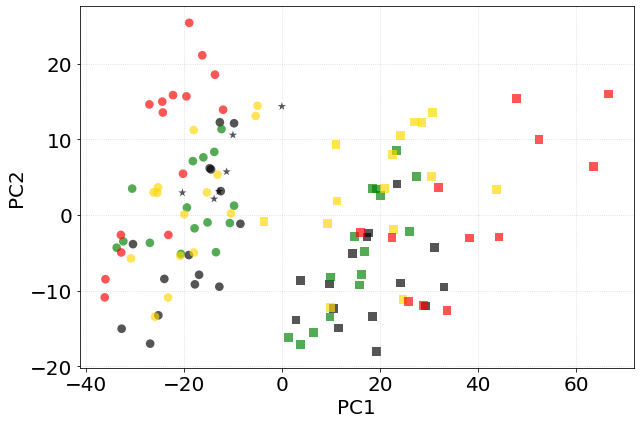

In [15]:
matplotlib.pyplot.figure(figsize=(9, 6))

for i in wdf.index:

  # colors
  if wdf.iloc[i]['Treatment'] == 'EGM':
    plotting_color = 'black'
  elif wdf.iloc[i]['Treatment'] == '1.0':
    plotting_color = 'green'
  elif wdf.iloc[i]['Treatment'] == '10.0':
    plotting_color = 'gold'
  elif wdf.iloc[i]['Treatment'] == '100.0':
    plotting_color = 'red'
  else:
    print('error')

  # markers
  if wdf.iloc[i]['Time'] == 0:
    plotting_marker = '*'
  elif wdf.iloc[i]['Time'] == 4:
    plotting_marker = 'o'
  elif wdf.iloc[i]['Time'] == 24:
    plotting_marker = 's'
  else:
    print('error')

  # position
  posx = principal_df.iloc[i]['PC1']
  posy = principal_df.iloc[i]['PC2']

  # plot
  matplotlib.pyplot.scatter(posx, posy, s=75, c=plotting_color, alpha=2/3, ec=None, marker=plotting_marker)

matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1')
matplotlib.pyplot.ylabel('PC2')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# tSNSE

In [16]:
embedding = sklearn.manifold.TSNE(n_components=2, init='pca', verbose=1, perplexity=15, learning_rate=10, metric='cosine', early_exaggeration=3, method='exact').fit_transform(x)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 123 / 123
[t-SNE] Mean sigma: 0.245377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 6.504122
[t-SNE] KL divergence after 1000 iterations: 0.425096


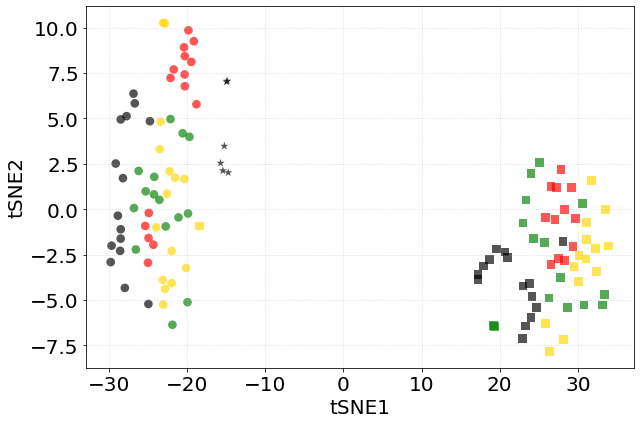

In [17]:
matplotlib.pyplot.figure(figsize=(9, 6))

for i in wdf.index:

  # colors
  if wdf.iloc[i]['Treatment'] == 'EGM':
    plotting_color = 'black'
  elif wdf.iloc[i]['Treatment'] == '1.0':
    plotting_color = 'green'
  elif wdf.iloc[i]['Treatment'] == '10.0':
    plotting_color = 'gold'
  elif wdf.iloc[i]['Treatment'] == '100.0':
    plotting_color = 'red'
  else:
    print('error')

  # markers
  if wdf.iloc[i]['Time'] == 0:
    plotting_marker = '*'
  elif wdf.iloc[i]['Time'] == 4:
    plotting_marker = 'o'
  elif wdf.iloc[i]['Time'] == 24:
    plotting_marker = 's'
  else:
    print('error')

  # position
  posx = embedding[i][0]
  posy = embedding[i][1]

  # plot
  matplotlib.pyplot.scatter(posx, posy, s=75, c=plotting_color, alpha=2/3, ec=None, marker=plotting_marker)

matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('tSNE1')
matplotlib.pyplot.ylabel('tSNE2')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()
# are we sure of the flip? 5 samples of 50 uM at four hours seem to behave like much lower concentration, almost 0.5 uM. 

# UMAP

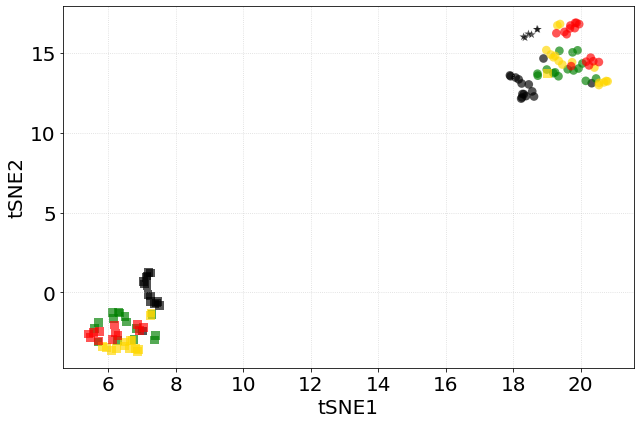

In [18]:
reducer = umap.UMAP(metric='cosine', n_neighbors=6, min_dist=0.1)
umap_embedding = reducer.fit_transform(x)

matplotlib.pyplot.figure(figsize=(9, 6))

for i in wdf.index:

  # colors
  if wdf.iloc[i]['Treatment'] == 'EGM':
    plotting_color = 'black'
  elif wdf.iloc[i]['Treatment'] == '1.0':
    plotting_color = 'green'
  elif wdf.iloc[i]['Treatment'] == '10.0':
    plotting_color = 'gold'
  elif wdf.iloc[i]['Treatment'] == '100.0':
    plotting_color = 'red'
  else:
    print('error')

  # markers
  if wdf.iloc[i]['Time'] == 0:
    plotting_marker = '*'
  elif wdf.iloc[i]['Time'] == 4:
    plotting_marker = 'o'
  elif wdf.iloc[i]['Time'] == 24:
    plotting_marker = 's'
  else:
    print('error')

  # position
  posx = umap_embedding[i][0]
  posy = umap_embedding[i][1]

  # plot
  matplotlib.pyplot.scatter(posx, posy, s=75, c=plotting_color, alpha=2/3, ec=None, marker=plotting_marker)

matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('tSNE1')
matplotlib.pyplot.ylabel('tSNE2')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()
# really need to do it at separate times two figures. go for it

In [19]:
# Visualization 4 h

# Visualization 4 h

In [20]:
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x4)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print(principal_df.shape)
principal_df.head()

(60, 2)


,PC1,PC2
0,17.372738,-6.019640
1,4.314770,-13.718185
2,-10.684510,-8.439504
3,5.533426,-14.987608
4,12.851549,-11.203167


In [21]:
sub4.head()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
6,EGM,4.0,0.0,2.778891,3.018029,2.584915,3.206251,3.062571,3.187655,4.254511,3.657370,2.946954,2.976021,2.845260,3.353738,3.044469,3.492182,2.912819,3.379255,3.039268,3.340532,3.714624,2.720518,4.224440,4.238617,2.897668,3.658405,4.410418,3.520591,3.074279,3.597446,3.148819,3.934553,2.617293,4.262139,3.285942,3.548943,4.818158,3.125791,4.499917,...,3.480279,3.708941,3.349490,3.380870,3.220351,2.901722,2.880568,2.394607,2.581901,3.251720,2.820694,2.977860,3.369108,3.410926,3.391619,3.877219,4.044597,4.065813,3.945104,2.954285,2.923950,2.571815,2.540663,2.626400,3.425609,3.484796,3.552651,3.495859,2.871448,2.854137,2.878341,2.955630,2.919119,3.375418,2.453893,3.830265,3.919134,4.015536,3.967704,3.941529
7,EGM,4.0,1.0,2.728064,3.120838,2.940552,3.153586,3.101896,3.220197,4.133439,3.683816,2.637036,2.912207,2.557256,3.280541,2.722096,3.252946,2.872049,3.373684,3.085301,3.018336,3.466837,2.801165,4.048104,4.019987,2.886494,3.369402,4.385550,3.601015,3.238122,3.579940,3.134389,4.158083,2.528431,4.019612,3.377842,3.634880,4.741987,3.264382,4.361813,...,3.469165,3.624164,3.374372,3.425767,3.383387,3.577591,3.516646,2.939122,2.918448,3.208067,2.763622,2.873035,3.326130,3.373400,3.364421,3.868825,3.941498,4.047234,3.889507,2.975897,2.984999,3.271669,3.258985,3.309690,3.365049,3.374460,3.477838,3.406752,2.952040,3.056612,3.091496,3.116901,2.980220,3.318344,2.706795,3.681804,3.919083,3.915277,3.891386,3.814840
8,EGM,4.0,2.0,2.793255,3.120822,2.524168,3.200756,3.007483,3.262029,4.184274,3.506483,2.719304,3.075010,2.772401,3.266531,2.738677,3.215965,2.993051,3.111542,2.635886,3.024099,3.432261,2.723650,3.854061,3.866430,2.831051,3.389426,4.382809,3.499143,3.261007,3.691195,3.144823,4.028737,2.511727,3.669743,3.213756,3.555701,4.648815,3.083954,4.367809,...,3.298758,3.387115,3.149595,3.183369,3.091194,2.779461,2.909516,2.276957,2.280087,3.163926,2.711510,2.928316,3.246383,3.277377,3.227562,3.662521,3.842311,3.835673,3.729686,2.592240,2.690408,2.950085,2.763304,2.779728,3.364341,3.365207,3.359078,3.409321,2.915483,2.888696,3.026669,3.130884,2.979540,3.291043,2.255750,3.735185,3.910741,3.947385,3.817023,3.935998
9,EGM,4.0,3.0,2.738878,3.133249,2.804420,3.167020,2.999516,3.237873,4.056277,3.501002,2.620303,2.874176,2.852858,3.261003,2.917292,3.351705,2.860319,3.286392,2.905445,3.243750,3.720078,2.832187,4.139638,4.143009,2.950428,3.620441,4.464293,3.522721,3.284885,3.697936,3.187040,3.952755,2.711083,4.114662,3.257870,3.994192,4.769914,3.093510,4.441527,...,3.406941,3.412338,3.

IndexError: ignored

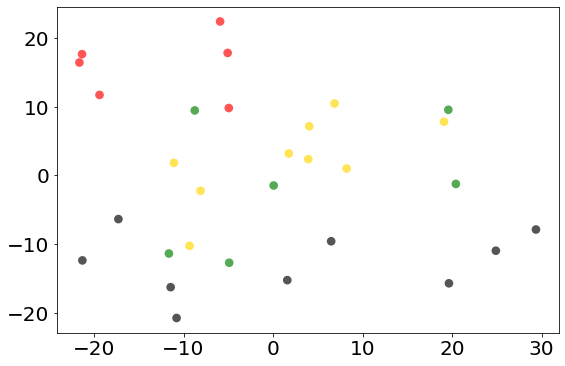

In [22]:
matplotlib.pyplot.figure(figsize=(9, 6))

for i in sub4.index:

  # colors
  if sub4.iloc[i]['Treatment'] == 'EGM':
    plotting_color = 'black'
  elif sub4.iloc[i]['Treatment'] == '1.0':
    plotting_color = 'green'
  elif sub4.iloc[i]['Treatment'] == '10.0':
    plotting_color = 'gold'
  elif sub4.iloc[i]['Treatment'] == '100.0':
    plotting_color = 'red'
  else:
    print('error')

  # markers
  if sub4.iloc[i]['Time'] == 0:
    plotting_marker = '*'
  elif sub4.iloc[i]['Time'] == 4:
    plotting_marker = 'o'
  elif sub4.iloc[i]['Time'] == 24:
    plotting_marker = 's'
  else:
    print('error')

  # position
  posx = principal_df.iloc[i]['PC1']
  posy = principal_df.iloc[i]['PC2']

  # plot
  matplotlib.pyplot.scatter(posx, posy, s=75, c=plotting_color, alpha=2/3, ec=None, marker=plotting_marker)

matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1')
matplotlib.pyplot.ylabel('PC2')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

visualize, pca or tnse
then variable features
then volcano plot of specific conditions
heatmap of major significant changes. maybe the heatmap should be for features that are always significant, no matter the condition.
